# Iris Dataset Notebook

![iris_species](http://jidan.sinkpoint.com/images/tf_logisticregression_deco.png)






## Introduction
In this notebook I will be explaining the basic functions of displaying the iris dataset & demonstrating the difficulties of seperating the three classes of iris based on the variables in the dataset.I will be using an incredibly popular data management library, “Pandas”.

### Importing libraries 

In [1]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

### Reading the dataset raw, and displaying it
I am loading the dataset using url in order to make it simpler to read and not to overcomplicate things,then displaying snippet of it.

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Information
When working with a certain dataset it is very important to check it properly before working with it , so summary of the database is very important.

In [3]:
#printing the shape

print(dataset.shape)

(150, 5)


In [4]:
#more info on the data

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [5]:
# description of the dataset

print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
#class distribution

print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [7]:
#displaying the dataset table without a certain column can be very useful tool, 
##in this example I am going to drop the class column just to show how the function works and can be used.

##dataset = dataset.drop(columns="class")

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Displaying the iris dataset on histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AD3E2C5F8>,
      dtype=object)

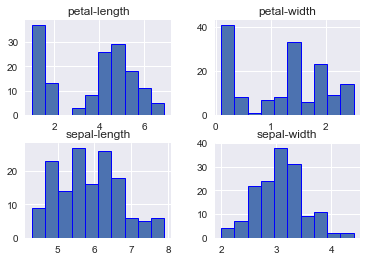

In [8]:
dataset.hist(edgecolor='blue',bins =10, linewidth=1)

## Difficulties faced with iris set 
Setosa is very easy to separate from the other two, but virginica and versicolor have some overlap.
I will show you a great example by plotting it below.

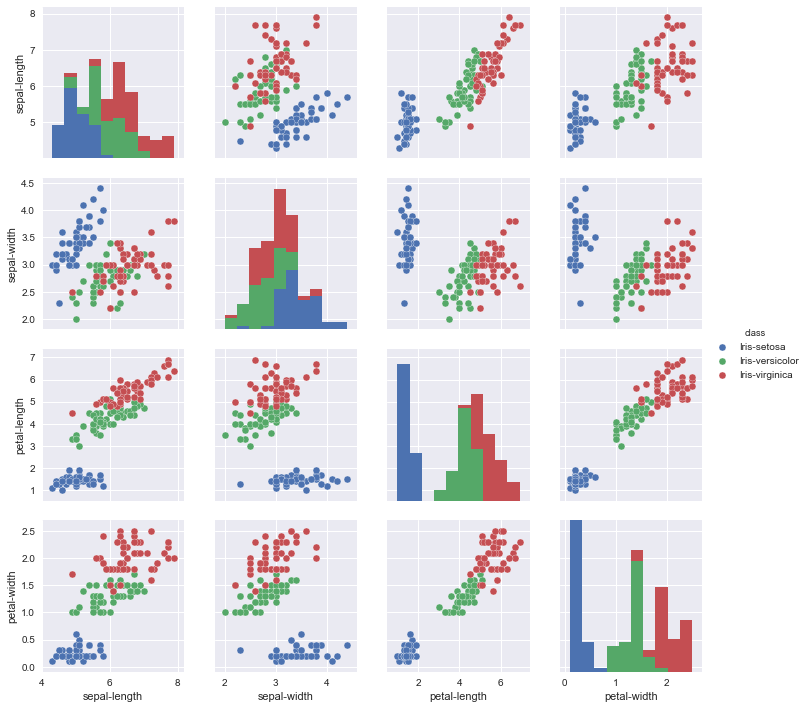

In [9]:
sns.pairplot(dataset, hue="class")
